# Timing dot_complex function

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of the function `dot_complex` using different `dot_real` functions.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000, 1500, 2000, 5000, 10000])

In [3]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_parallel = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # dot_complex function='dumb'
    time = %timeit -o -n 100 -r 100 fcs.dot_complex(vector, vector, function='dumb')
    list_time_dumb.append(time.average)
    # dot_complex function='numpy'
    time = %timeit -o -n 100 -r 100 fcs.dot_complex(vector, vector, function='numpy')
    list_time_numpy.append(time.average)
    # dot_complex function='numba'
    time = %timeit -o -n 100 -r 100 fcs.dot_complex(vector, vector, function='numba')
    list_time_numba.append(time.average)
    # dot_complex function='parallel'
    time = %timeit -o -n 100 -r 100 fcs.dot_complex(vector, vector, function='parallel')
    list_time_parallel.append(time.average)

255 µs ± 17.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
53.9 µs ± 6.04 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 1154.75 times longer than the fastest. This could mean that an intermediate result is being cached.
77.2 µs ± 703 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 180.62 times longer than the fastest. This could mean that an intermediate result is being cached.
699 µs ± 2.22 ms per loop (mean ± std. dev. of 100 runs, 100 loops each)
738 µs ± 48.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
58.7 µs ± 4.95 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
8.77 µs ± 728 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 5.83 times longer than the fastest. This could mean that an intermediate result is being cached.
471 µs ± 84.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.21 ms ± 52.5 µs per loop (mean ± std. dev. of 100 run

In [4]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)
list_time_parallel = np.array(list_time_parallel)

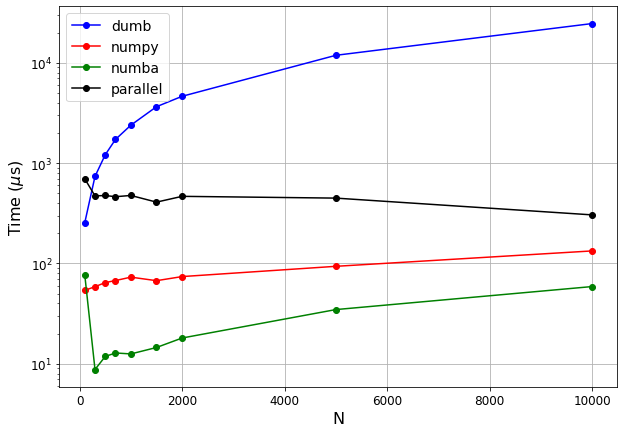

In [5]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N, list_time_parallel*1e6, 'ko-', label = 'parallel')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()